## 1. TF-IDF : 형태소나누기

In [3]:
sample_text = ["데이터 과학은 과학적인 방법, 과정, 알고리즘, 시스템을 사용하여 구조화된 데이터와 비구조화된 데이터에서 지식과 통찰을 추출하는 학문 분야입니다.",
               "머신 러닝은 인공지능의 한 분야로, 알고리즘과 통계적 모델을 사용하여 컴퓨터가 경험을 통해 작업 성능을 개선하도록 하는 기술입니다.",
               "인공지능은 인간의 지능을 기계에서 시뮬레이션하는 것으로, 인간처럼 생각하고 행동하도록 프로그램된 시스템을 말합니다."]

In [4]:
sample_text

['데이터 과학은 과학적인 방법, 과정, 알고리즘, 시스템을 사용하여 구조화된 데이터와 비구조화된 데이터에서 지식과 통찰을 추출하는 학문 분야입니다.',
 '머신 러닝은 인공지능의 한 분야로, 알고리즘과 통계적 모델을 사용하여 컴퓨터가 경험을 통해 작업 성능을 개선하도록 하는 기술입니다.',
 '인공지능은 인간의 지능을 기계에서 시뮬레이션하는 것으로, 인간처럼 생각하고 행동하도록 프로그램된 시스템을 말합니다.']

In [5]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [6]:
documents = []

for doc in sample_text:
    doc_pos = [i[0] for i in kiwi.tokenize(doc)]
    documents.append(' '.join(doc_pos))

In [27]:
documents

['데이터 과학 은 과학 적 이 ᆫ 방법 , 과정 , 알고리즘 , 시스템 을 사용 하 어 구조 화 되 ᆫ 데이터 와 비 구조 화 되 ᆫ 데이터 에서 지식 과 통찰 을 추출 하 는 학문 분야 이 ᆸ니다 .',
 '머신 러닝 은 인공 지능 의 한 분야 로 , 알고리즘 과 통계 적 모델 을 사용 하 어 컴퓨터 가 경험 을 통하 어 작업 성능 을 개선 하 도록 하 는 기술 이 ᆸ니다 .',
 '인공지능 은 인간 의 지능 을 기계 에서 시뮬레이션 하 는 것 으로 , 인간 처럼 생각 하 고 행동 하 도록 프로그램 되 ᆫ 시스템 을 말 하 ᆸ니다 .']

## 2. TF-IDF : TfidfVectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer = TfidfVectorizer() # 벡터라이즈 생성


In [30]:
#tf-idf 계산
tfidf_matrix = vectorizer.fit_transform(documents)

In [31]:
words = vectorizer.get_feature_names_out()
words


array(['ᆸ니다', '개선', '경험', '과정', '과학', '구조', '기계', '기술', '데이터', '도록', '러닝',
       '머신', '모델', '방법', '분야', '사용', '생각', '성능', '시뮬레이션', '시스템', '알고리즘',
       '에서', '으로', '인간', '인공', '인공지능', '작업', '지능', '지식', '처럼', '추출',
       '컴퓨터', '통계', '통찰', '통하', '프로그램', '학문', '행동'], dtype=object)

In [32]:
#데이터프레임으로 결과값 보기 
import pandas as pd

df = pd.DataFrame(tfidf_matrix.toarray(), columns = words)
df

,ᆸ니다,개선,경험,과정,과학,구조,기계,기술,데이터,도록,...,지식,처럼,추출,컴퓨터,통계,통찰,통하,프로그램,학문,행동
0,0.115297,0.000000,0.000000,0.195214,0.390428,0.390428,0.000000,0.000000,0.585642,0.000000,...,0.195214,0.000000,0.195214,0.000000,0.000000,0.195214,0.000000,0.000000,0.195214,0.000000
1,0.151287,0.256151,0.256151,0.000000,0.000000,0.000000,0.000000,0.256151,0.000000,0.194809,...,0.000000,0.000000,0.000000,0.256151,0.256151,0.000000,0.256151,0.000000,0.000000,0.000000
2,0.154242,0.000000,0.000000,0.000000,0.000000,0.000000,0.261154,0.000000,0.000000,0.198615,...,0.000000,0.261154,0.000000,0.000000,0.000000,0.000000,0.000000,0.261154,0.000000,0.261154


## 3. 워드클라우드로 시각화

In [33]:
tfidf_df = df.T
tfidf_df

,0,1,2
ᆸ니다,0.115297,0.151287,0.154242
개선,0.000000,0.256151,0.000000
경험,0.000000,0.256151,0.000000
과정,0.195214,0.000000,0.000000
과학,0.390428,0.000000,0.000000
구조,0.390428,0.000000,0.000000
기계,0.000000,0.000000,0.261154
기술,0.000000,0.256151,0.000000
데이터,0.585642,0.000000,0.000000
도록,0.000000,0.194809,0.198615


In [34]:
#0번 문서에 대한 tfidf 값
tfidf_df[0].sort_values(ascending = False)

데이터      0.585642
과학       0.390428
구조       0.390428
과정       0.195214
방법       0.195214
학문       0.195214
추출       0.195214
통찰       0.195214
지식       0.195214
분야       0.148465
시스템      0.148465
알고리즘     0.148465
사용       0.148465
에서       0.148465
ᆸ니다      0.115297
개선       0.000000
경험       0.000000
도록       0.000000
모델       0.000000
머신       0.000000
러닝       0.000000
기술       0.000000
시뮬레이션    0.000000
성능       0.000000
생각       0.000000
기계       0.000000
인공지능     0.000000
으로       0.000000
인공       0.000000
인간       0.000000
처럼       0.000000
지능       0.000000
작업       0.000000
컴퓨터      0.000000
통계       0.000000
통하       0.000000
프로그램     0.000000
행동       0.000000
Name: 0, dtype: float64

### 3. 워드클라우드로 시각화 

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(599.5), np.float64(299.5), np.float64(-0.5))

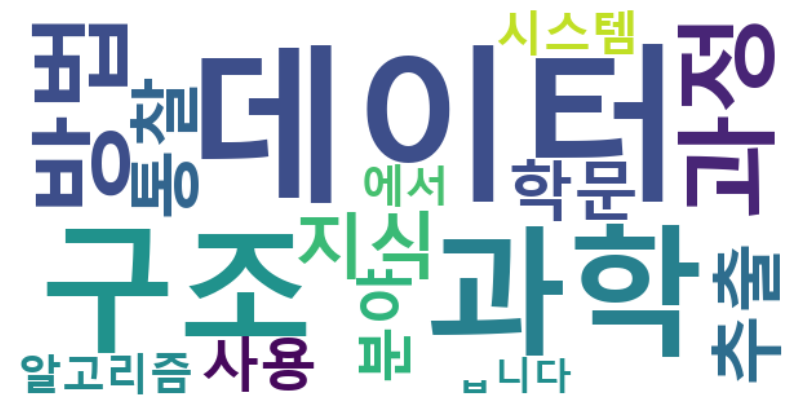

In [74]:
import numpy as np 
from PIL import Image

image_path = r'C:\Users\152\Web crowling\heart_image.jpg'

wc = WordCloud(
    font_path ='C:/Windows/Fonts/malgunbd.ttf', #한글이 꺠지지 않도록 폰트 경로 설정
    background_color = 'white',
    width = 600, height = 300,
).generate_from_frequencies(tfidf_df[0])

plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')

# 3-1 트리맵 시각화


In [50]:
import matplotlib
import matplotlib.pyplot as plt
import squarify
import matplotlib.font_manager as fm

In [52]:
data = tfidf_df[0].sort_values(ascending = False)[:15] #15개만 가져옴
data

데이터     0.585642
과학      0.390428
구조      0.390428
과정      0.195214
방법      0.195214
학문      0.195214
추출      0.195214
통찰      0.195214
지식      0.195214
분야      0.148465
시스템     0.148465
알고리즘    0.148465
사용      0.148465
에서      0.148465
ᆸ니다     0.115297
Name: 0, dtype: float64

In [53]:
label = data.index
sizes = data.values
print(label)
print(sizes) #sorting한 순서대로 출력됨

Index(['데이터', '과학', '구조', '과정', '방법', '학문', '추출', '통찰', '지식', '분야', '시스템',
       '알고리즘', '사용', '에서', 'ᆸ니다'],
      dtype='object')
[0.5856424  0.39042827 0.39042827 0.19521413 0.19521413 0.19521413
 0.19521413 0.19521413 0.19521413 0.14846538 0.14846538 0.14846538
 0.14846538 0.14846538 0.11529661]


In [63]:
#컬러 설정
#컬러맵 0~1

#컬러맵 정규화 
norm = matplotlib.colors.Normalize(vmin = min(sizes), vmax = max(sizes))

#매핑하기 
colors = [matplotlib.cm.spring(norm(s)) for s in sizes]

In [64]:
label = data.index
sizes = data.values
print(label)
print(sizes)

Index(['데이터', '과학', '구조', '과정', '방법', '학문', '추출', '통찰', '지식', '분야', '시스템',
       '알고리즘', '사용', '에서', 'ᆸ니다'],
      dtype='object')
[0.5856424  0.39042827 0.39042827 0.19521413 0.19521413 0.19521413
 0.19521413 0.19521413 0.19521413 0.14846538 0.14846538 0.14846538
 0.14846538 0.14846538 0.11529661]


In [69]:
#폰트설정 

#폰트경로가져오기 
font_path = r"C:\Windows\Fonts\malgun.ttf" 

#폰트 경로를 전달해서 폰트 이름을 가져오기 
font_name = fm.FontProperties(fname = font_path).get_name()

#matplotlib 폰트 변경
plt.rc('font',family = font_name)

#폰트 크기 변경
plt.rcParams['font.size'] = 13


(np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))

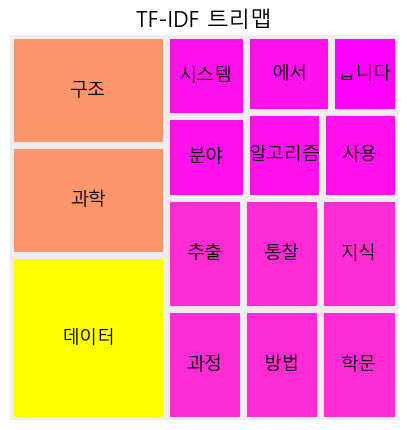

In [70]:
#트리맵 그리기 
plt.figure(figsize =(5,5)) #사이즈
squarify.plot(sizes = sizes, label = label, color = colors,
              bar_kwargs = dict(linewidth = 5, edgecolor = '#eee'))

plt.title('TF-IDF 트리맵')
plt.axis('off')

# 3-2 워드클라우드


In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [89]:
#이미지 불러오는 라이브러리 
from PIL import Image

In [90]:
image_path = r'C:\Users\152\Web crowling\heart_image.jpg'

In [91]:
mask_image = np.array(Image.open(image_path))
mask_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [94]:
#워드클라우드 선언해주기
wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\malgun.ttf", 
                      width = 700, 
                      height = 700,
                      background_color= 'white',
                      colormap= 'spring', 
                      mask = mask_image
                      ).generate_from_frequencies(tfidf_df[0])


Text(0.5, 1.0, 'TF-IDF 워드클라우드_document0')

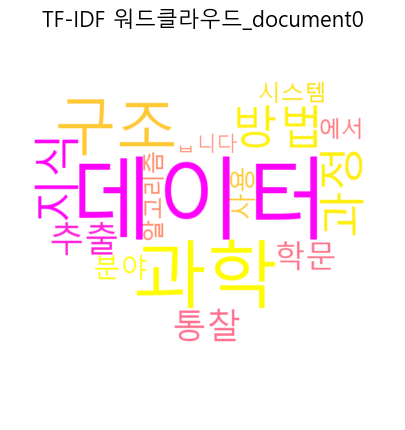

In [95]:
#plt 출력하기 
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF 워드클라우드_document0')